In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**DISCLAIMER:**

I have used AI to organize topics and what should come after what and also to format the writeup (I am currently learning markdown), the content is written by me alone, I have mentioned the resources i referenced at last. Many thanks to those, for helping me get a better understanding.

# 0. Pre-Introduction

In this notebook I explain all different methods typically used in Competetions, by implementing on Titanic Dataset.

I have tried my best to explain things in as detail as i can, also got it formatted and organized by google gemini 2.0 Flash. Got some ideas from grok 3, and researched different sources. 

In my opinion this is probably one of the few notebooks with such detailed explanation, especially for beginners. Or this might be the only one as of the date of Writing.

Making it public on 28 April 2025 IST. (for more Details see Changelog)

You are invited to **Upvote** this Notebook if you like it, **Downvote** if you Dislike it.

In Either case I invite Suggestions, advises, improvements, etc. from everyone.

I aim to make it a complete notebook for basics.

I will try my best to add all the inputs to the best of my abilities.

> #### **And Yes this is going to be long and weary.**

And I will include some of the good practices, including but not limited to:

* sitting posture
* eye relaxation and exercise

periodically in my notebook.

>### >TLDR; Basics for beginners<

## Pre-Requisites
* Basics of
    * Python
    * Matplorlib
    * Numpy
    * Seaborn
    * scikit-learn
    * pytorch
    * jupyter
    * Kaggle
    * Windows/Linux/MacOS whichever you are using
* An alert brain
* A way to operate your computer with ease. (hands, keyboard, mouse, etc.)
* Focus/Attention


> **Just go through Kaggle Learn**

### What You Need
- **Python**: The programming language we’ll use. Download it from [python.org](https://www.python.org/) if you don’t have it.
- **Jupyter Notebook**: A tool to write and run code in chunks. It’s like a digital notebook.
- **Libraries**:
  - `pandas`: For handling data (like Excel but cooler).
  - `numpy`: For math stuff.
  - `matplotlib` and `seaborn`: For making pretty charts.
  - `torch` (PyTorch): For building machine learning models.
  - `scikit-learn`: For extra tools like splitting data.
- **VS Code**: I personally use it for writing jupyter notebooks.

### Installing Everything
Open your terminal (or Command Prompt on Windows) and run:

```bash
pip install pandas numpy matplotlib seaborn torch scikit-learn
```

If you’re using Jupyter Notebook, install it too:

```bash
pip install jupyter
```

Then, start Jupyter by typing:

```bash
jupyter notebook
```

This opens a browser window. Click “New” → “Python 3” to create a notebook. You’re ready to code!

### **Or Simply Use Kaggle Notebook.**

## To Follow Along
You can try these methods:
1. Copy my Notebook and edit it and run code side by side (Not recommended for older laptops or those with less than 2 GB available/free RAM as it might slow down your computer and even scrolling would be frustrating)
2. Read from my notebook, Understand it, and then copy the cell and paste it in a new notebook (eg. on kaggle), this will be much better in comparison.
3. Read from my notebook, Understand it, and then create a new notebook and type code and run to enforce the habit of writing codes faster and getting a better understanding, especially for beginners. **(MOST RECOMMENDED METHOD)**

# 1. Introduction

The Titanic dataset is perhaps the most famous starting point for anyone new to Kaggle or machine learning competitions. But before diving into code, let's stop and ask: 
- *Why start with Titanic?*
- *Why do so many people start with Titanic?*
- *What are we really trying to learn here?*

### **Why the Titanic?**

The story of the Titanic is well known: in 1912, this "unsinkable" ship tragically sank after hitting an iceberg, resulting in the loss of over 1,500 lives out of more than 2,200 passengers and crew. 

But beyond the history, the Titanic dataset is perfect for learning the basics of Data Science and ML (and Deep Learning, will be added in later part), because:
- The dataset is small and easy to understand, so you can quickly try out ideas.
- The competition is open indefinitely, so there’s no deadline pressure. Competetion, because getting a good rank motivates people.
- The problem-predicting who survived-is simple, but not trivial. It requires a bit of thinking, experimenting, and learning new techniques.

### **What’s the Goal?**

Our main task is to predict whether a given passenger survived the disaster, using information like their age, sex, ticket class, and more. Kaggle provides us with two datasets and one sample submission file:

- **train.csv**: Contains information about passengers *and* whether they survived (the "ground truth").
- **test.csv**: Contains information about other passengers, but *not* whether they survived. Our job is to predict these outcomes and submit our prediction to Kaggle for scoring.
- **gender_submission.csv**: A sample submission file to show the format.

Our goal is to build a model that predicts `Survived`(the target) as accurately as possible. The Competetion scores you on **accuracy** (how many predictions you get right).

### **Why Do We Do Each Step?**

When you look at a competition like this, it’s easy to compulsively want to jump straight into coding. 

But let's pause and reflect, every action we take should have a purpose. 

First Let's Discuss what we usually do:

- **Loading the data**:
  Before we can do anything, we need to see what information we have, what will we perform our operations on? we need the data right? hence we need to load the Data.
- **Exploring the data**:
  We need to understand the data, what is it?, what does it look like?, what columns it has?, the values in respective column, and what can we gather by looking at the data?, that is the entire context behind the numbers. Eg. Who were the passengers? Are there patterns in who survived?
- **Cleaning the data**:
  Real-world data is messy. There are missing ages, strange ticket numbers, and more. We need to tidy this up so that our models don’t get confused. Btw, this is also a reason why we explore the data.
- **Feature engineering**:
  Sometimes, the raw data isn’t enough. We can create new features-like extracting a person’s title from their name (Mr, Mrs, etc.)-to give our models more clues.
- **Building models**:
  We try different algorithms to see which one best captures the patterns in the data. These models are basically mathematical models (analogy, think of them like functions or relations or mappings or algorithms etc), we implement them or use a library or module (basically a .py file with code already written in it for us) to implement them.
- **Evaluating and comparing**:
  No model is perfect. We compare their results to see which is most reliable. If we knew the exact steps to take to get 100% accurate output, we would have used that algorithm instead, and not bother about ML or DL, but in real world we do not have the entire data including all possibilities that could 100% tell the correct output for any case as no case would have been outside of that data (as it is the most complete data), Obviously, we cannot do that, so we resort to approximation or finding hidden logics or patterns in limited data, for this we train a model that can give correct or approximately correct output most of the time. Here, let's talk about titanic dataset, lets assume we have a complete data of all the people in the world that if they had boarded the ship, had they survived or not, then we could accurately say that this person X would 100% survive or Y would 100% not survive. But we only have data of people who boarded that ship (that is, a very small subset of complete data), and even among that we have some discrepancy, like someones age is missing etc. So we try to train a model that will closely(more accurately) predict whether an unknown person will survive or not.
- **Submission**:
  Finally, we take our best model, make predictions on the test set, and submit them to Kaggle to see how we did.

### **What Will We Learn?**

By working through this notebook, we’ll learn:

- How to load and explore data using Python and pandas.
- How to visualize patterns and spot missing data.
- How to clean and preprocess data for machine learning.
- How to engineer new features to improve model performance.
- How to train, compare, and evaluate different machine learning models.
- How to make a Kaggle submission and interpret the results.

### **Thinking Like a Data Scientist**

Throughout this journey, we’ll constantly ask ourselves:

- *What is the data telling me or what can I infer from this data?*
- *Why am I making this decision, why should I do this instead of that?*
- *How can I improve my results?*

This mindset-of questioning, exploring, and iterating-is at the heart of data science and ML/DL.

# 2. Data

In this section, we prepare and explore the Titanic dataset by converting key variables into dataframes and visualizing their distributions to gain insights into the data structure and potential patterns for modeling.  

First, we read the CSV files using pandas and inspect the shape of each DataFrame to confirm the number of samples and features available for training and testing.  

Next, we observe numeric features - such as PassengerId, Pclass, Age, SibSp, Parch, and Fare.

To understand the central tendencies and spread of these features, we call pandas’ `describe()` on the training set, giving us quick access to mean, standard deviation, and quartile information.  

Finally, we employ seaborn and matplotlib to visualize:  
- The distribution of **Age** (to spot skewness or outliers)  
- The distribution of **Fare** (to observe fare ranges and potential bins)  
- Overall **survival counts** (to see class imbalance)  
- **Survival rate by sex** (to identify strong predictors)  
These plots reveal patterns that will inform our feature engineering steps.  

## 2.1. EDA - Exploratory Data Analysis

Let's Import the required libraries first. *(Ask Yourself Why?)*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dont mind this for now, this is not directly relevant to our aim here.

In [ ]:
# Set plot style
sns.set(style="whitegrid")

#### Now Let’s load the Titanic data and take a peek.

In [ ]:
# Load data with pandas
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df  = pd.read_csv('/kaggle/input/titanic/test.csv')

#### **Let's Look at how we approach anything, I will only do this once, later we will do shorter explanations (probably, or i might just continue like this)**

Let's break down these two lines of Python code step-by-step.

Imagine we have some information written down, maybe in a notebook or on index cards. To do anything useful with that information using a computer, we first need to get it *into* the computer's memory in a way the computer understands.

These lines of code are doing exactly that: **loading data from files into the computer's memory**.

Let's look at the first line:

```python
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
```

**1. What's the Goal Here?**

The goal is to read data from a specific file (`train.csv`) and store it somewhere in our program so we can work with it later.

**2. How is Data Often Stored?**

When dealing with data, especially structured data (like tables with rows and columns), a very common file format is **CSV**.

*   **What does CSV stand for?** Comma-Separated Values.
*   **What does that mean?** It's usually a plain text file (you know, like that .txt one) where each line represents a row of data, and the values (the pieces of information) within that row are separated by commas. Let's think of it like a simple spreadsheet saved as text.
*   **Why use CSV?** It's simple, human-readable (to some extent), and widely supported by different programs (spreadsheets like Excel or Google Sheets, databases, programming languages). Most importantly, its simple.

**3. How Do We Read a CSV File in Python?**

Python itself has built-in ways to read files line by line. We *could* manually open the file, read each line, split the line by commas, and try to organize it. By manually I mean like using string methods or simple for loops, etc., like we split a row of a csv using string_1.split(',') to create it into a list then maybe store these lists into a bigger list making something like a 2d list. Most importantly, these libraries optimize this, that is make it faster.

*   **But wait, is that the best way?** Probably not! Doing it manually can be tedious. What if a value itself contains a comma (like "Doe, John")? What if some values are numbers and some are text? We'd have to handle all these details ourselves. It sounds like a lot of work and potential for mistakes.

*   **Is there a specialized tool for this?** Yes! This is where **libraries** come in. Libraries are collections of pre-written code designed to solve common problems. For handling data in Python, especially table-like data, probably the most popular in use and powerful library is **pandas**.

**4. What is `pd`?**

*   You see `pd` at the beginning. Where did that come from? Certainly, it came from *before*, **Remember** there was a line like this:
    ```python
    import pandas as pd
    ```
*   **What does `import pandas` do?** It tells Python: "Hey, I want to use the functionality available in the 'pandas' library." basically, for simplicity, think of it like manually copying the functions in pandas into the current file (current scope) and then calling those functions (here calling them like pandas.dothis() etc.), this is a better, more systemized way to do it.
*   **What does `as pd` do?** It's like giving the library a nickname. Instead of typing `pandas` every time we want to use something from it, we can just type the shorter alias `pd`. It's a very common convention among Python data analysts and scientists. Think of it as referring to your friend "Alexander" as "Alex" for short.

**5. What is `.read_csv()`?**

*   The dot (`.`) after `pd` means we are accessing something *inside* the pandas library (which we're calling `pd`).
*   `read_csv` is a **function** provided by pandas. A function is a block of code that performs a specific task.
*   **What task does `read_csv` perform?** Its specific job is to read data from a Comma-Separated Values (CSV) file. It's designed to handle all those tricky details we worried about earlier (commas within values, different data types, missing values, etc.) automatically and efficiently.

**6. What is `('/kaggle/input/titanic/train.csv')`?**

*   This is the **argument** we are giving to the `read_csv` function. An argument is the input that a function needs to do its job.
*   **What does this specific argument mean?** It's a **string** (a piece of text, denoted by the quotes `' '`) that represents the **file path**.
*   **What's a file path?** It's like an address that tells the computer exactly where to find the file on the system's storage (like a hard drive).
    *   `/`: Often signifies the root or top-level directory.
    *   `kaggle/`: A folder named 'kaggle'.
    *   `input/`: A sub-folder inside 'kaggle' named 'input'.
    *   `titanic/`: A sub-folder inside 'input' named 'titanic'.
    *   `train.csv`: The actual name of the file we want to read.
*   **Why this specific path?** Well Duh! This path contains our files that we will work on. Well, it's where Kaggle typically makes competition data available to the code environments running on their platform, you know after you create a notebook from kaggle competetion eg titanic here.
*   **So, what are we telling `pd.read_csv`?** We're telling it: "Please read the data from the file named `train.csv` which is located inside the `titanic` folder, which is inside the `input` folder, which is inside the `kaggle` folder, starting from the root directory."

**7. What does `train_df =` mean?**

*   `=` is the **assignment operator** in Python. It takes the result of whatever is on the right side and stores it in a **variable** named on the left side.
*   `train_df` is the name we've chosen for our variable.
*   **What is the result of `pd.read_csv(...)`?** When pandas reads a CSV file, it organizes the data into a special structure called a **DataFrame**.
*   **What's a DataFrame?** It's the primary data structure in pandas. Think of it as a highly optimized and flexible table in memory, similar to a spreadsheet or a database table. It has rows and columns, and you can easily select data, manipulate it, calculate things, etc.
*   **Why the name `train_df`?**
    *   `train`: Because the data comes from `train.csv`, which typically contains the data used to "train" a machine learning model (i.e., teach it patterns).
    *   `df`: This is a very common suffix used by convention to indicate that the variable holds a pandas DataFrame. It makes the code easier to read, as you immediately know the type of data stored in `train_df`.

**So what does the first line say?:**

"Import the pandas library and call it `pd`. Then, use the `read_csv` function from pandas to read the file located at `/kaggle/input/titanic/train.csv`. Take the resulting table-like structure (a DataFrame) and store it in a variable named `train_df`."

Now, let's look at the second line:

```python
test_df  = pd.read_csv('/kaggle/input/titanic/test.csv')
```

> "Hmm, this looks almost identical to the first line. What's different?"

*   **`pd.read_csv(...)`**: We're using the same function from the pandas library (`pd`) to read another CSV file.
*   **`'/kaggle/input/titanic/test.csv'`**: The file path is slightly different. It's still in the same directory (`/kaggle/input/titanic/`), but this time the filename is `test.csv`.
    *   **Why `test.csv`?** In many data science tasks, especially competitions (like the Titanic), the data is split into two sets:
        *   `train.csv`: Contains data *with* the answers (e.g., it includes whether each passenger survived). This is used to build and train a predictive model.
        *   `test.csv`: Contains data *without* the answers. This is used to test how well the trained model performs on unseen data. The goal is usually to predict the answers for this dataset.
*   **`test_df =`**: We're assigning the result (the DataFrame created from `test.csv`) to a *new* variable named `test_df`.
    *   **Why `test_df`?** Following the same logic, `test` indicates it's the testing data, and `df` indicates it's a DataFrame.

**What does the second line say?:**

"Use the `read_csv` function from pandas (`pd`) again. This time, read the file located at `/kaggle/input/titanic/test.csv`. Store the resulting DataFrame in a new variable named `test_df`."

These two lines are fundamental starting points, you will almost always use these.

They use the powerful pandas library to:

1.  Load a dataset intended for training (`train.csv`) into a DataFrame called `train_df`.
2.  Load a separate dataset intended for testing (`test.csv`) into another DataFrame called `test_df`.

Once these lines are executed, the data from those files is now readily available inside the Python program, stored in these two DataFrame variables (`train_df` and `test_df`), ready for inspection, cleaning, analysis, and modeling and whatever we want to do.

In [ ]:
# Display basic info
print(f"Train data shape: {train_df.shape}")
print(f"Test data shape:  {test_df.shape}")

In [ ]:
# Basic statistics
print(train_df.describe())

In [ ]:
print(train_df.head())

In [ ]:
print(train_df.tail())

> *What Do you See?*

The dataset has rows (passengers) and columns (features like `Age`, `Sex`, etc.).

**Here’s what the columns mean:**

- `PassengerId`: Unique ID for each passenger.
- `Survived`: 1 (survived) or 0 (didn’t survive).
- `Pclass`: Ticket class (1 = 1st class, 2 = 2nd, 3 = 3rd).
- `Name`: Passenger’s name.
- `Sex`: Male or female.
- `Age`: Passenger’s age.
- `SibSp`: Number of siblings/spouses aboard.
- `Parch`: Number of parents/children aboard.
- `Ticket`: Ticket number.
- `Fare`: Ticket price.
- `Cabin`: Cabin number (often missing).
- `Embarked`: Port they boarded from (C = Cherbourg, Q = Queenstown, S = Southampton).

#### **Now Let's Now Visualize it**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

**What do you see?**
- Most passengers are around 20–40 years old.
- The **kde** (curvy line) shows the shape. If it’s skewed (lopsided), we might need to adjust `Age` later.

**1. What's the Goal here?**

The goal is to create a **histogram** showing how ages are distributed in the training dataset.

*   **What's a histogram?** Imagine you have a bunch of ages, like 25, 30, 25, 40, 25, 35... A histogram groups these ages into ranges (e.g., 20-25, 25-30, 30-35, etc.) and then shows how many people fall into each range. It's a way to see the shape of the data, like whether most people are young, old, or somewhere in the middle.
*   **Why visualize data?** Because sometimes seeing a picture is much easier than looking at a table full of numbers! Visualizations help us understand patterns, spot outliers (unusual data points), and get a feel for the data.

**2. What are `plt` and `sns`?**

*   Just like with `pd` (for pandas), `plt` and `sns` are aliases for libraries:
    *   `plt` is short for `matplotlib.pyplot`.
        *   **What's `matplotlib`?** It's the most fundamental plotting library in Python. Think of it as the foundation for creating all sorts of graphs and charts.
        *   **What's `pyplot`?** It's a module within `matplotlib` that provides a convenient way to create plots in a style similar to MATLAB (another popular numerical computing environment).
    *   `sns` is short for `seaborn`.
        *   **What's `seaborn`?** It's a library built on top of `matplotlib`. Seaborn makes it easier to create statistically informative and visually appealing plots. It has a higher-level interface, meaning you can often create more complex plots with less code compared to using `matplotlib` directly. It's like having a more advanced toolset for plotting.
*   **How do we know they're libraries?** Somewhere before this code, we probably had lines like:
    ```python
    import matplotlib.pyplot as plt
    import seaborn as sns
    ```
    These lines import the libraries and give them the aliases `plt` and `sns`, respectively.

**3. `plt.figure(figsize=(10, 6))`**

*   **What's `plt.figure()`?** This is a function from `matplotlib.pyplot` (`plt`) that creates a new figure. Think of a figure as the overall canvas or window where your plot will be drawn.
*   **What's `figsize=(10, 6)`?** This is an argument to the `figure()` function that specifies the size of the figure.
    *   `figsize` is a keyword argument, meaning we're explicitly telling the function what we want to set.
    *   `(10, 6)` is a **tuple** (an ordered, immutable sequence of values) that represents the width and height of the figure, respectively, in inches.
    *   **Why set the figure size?** The default size might not be ideal for all plots. We often adjust it to make the plot easier to read and fit better on the screen or in a report.
*   **So, what does this line do?** It creates a new plotting figure that is 10 inches wide and 6 inches high.

**4. `sns.histplot(train_df['Age'].dropna(), kde=True)`**

*   **What's `sns.histplot()`?** This is the star of the show! It's a function from the `seaborn` library (`sns`) specifically designed to create histograms (and related plots).
*   **What's `train_df['Age']`?**
    *   Remember `train_df` is our DataFrame containing the training data.
    *   `['Age']` is how we select a specific **column** from the DataFrame. In this case, we're selecting the column named "Age," which presumably contains the ages of the passengers.
    *   **Why select the "Age" column?** Because we want to visualize the distribution of ages, so that's the data we need to use for the histogram.
*   **What's `.dropna()`?**
    *   This is a method (a function associated with an object) that we're calling on the result of `train_df['Age']`.
    *   **What could be in `train_df['Age']` besides ages?** It's possible that some age values are missing (e.g., recorded as "NaN" - Not a Number).
    *   **Why remove missing values?** If we include "NaN" values in the histogram, it might mess up the plot or even cause an error. `dropna()` creates a new series (a one-dimensional labeled array) containing only the non-missing age values.
    *   Think of it as cleaning up the data before plotting.
*   **What's `kde=True`?**
    *   `kde` is another keyword argument to `histplot()`.
    *   **What's KDE?** It stands for Kernel Density Estimation. It's a way to estimate the probability density function of a continuous random variable (in this case, age).
    *   **What does that mean in plain English?** Instead of just showing the bars of the histogram, KDE draws a smooth curve that represents the overall shape of the distribution. It's like a smoothed-out version of the histogram that can make it easier to see the general trend.
    *   **Why use KDE?** It can help you see the underlying shape of the distribution more clearly, especially if the histogram bars are a bit noisy (uneven).
*   **So, what does this line do?** It tells seaborn to create a histogram using the "Age" column from the `train_df` DataFrame, after removing any missing values. It also adds a Kernel Density Estimation (KDE) curve to the plot, showing a smoothed estimate of the age distribution.

**5. `plt.title('Age Distribution')`**

*   **What's `plt.title()`?** This is a function from `matplotlib.pyplot` (`plt`) that sets the title of the plot.
*   **What's `'Age Distribution'`?** This is the text we want to use as the title of the plot. It's a string.
*   **Why add a title?** A title helps people quickly understand what the plot is showing.
*   **So, what does this line do?** It adds the title "Age Distribution" to our plot.

**6. `plt.show()`**

*   **What's `plt.show()`?** This is a function from `matplotlib.pyplot` (`plt`) that displays the plot.
*   **Why is this needed?** Matplotlib doesn't automatically show the plot as soon as you create it. You need to explicitly call `plt.show()` to make the plot appear on the screen (or save it to a file).
*   **So, what does this line do?** It tells matplotlib to display the histogram we've created.

**Putting It All Together:**

>"Okay, I want to see how the ages are distributed in my training data.

>1.  First, I'll create a blank canvas (a figure) that's a good size for my plot.
>2.  Then, I'll use seaborn to draw a histogram of the "Age" column from my `train_df`. But first, I'll remove any missing age values so they don't mess things up. And I'll also add a smooth curve (KDE) to show the overall shape of the distribution.
>3.  I'll give my plot a title so people know what it's about.
>4.  Finally, I'll tell matplotlib to actually show me the plot. "

And that's how this code creates a visual representation of the age distribution!

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

#### Similar explanation for this, so i will not explain again.

**Now Let's Look at What’s this?**
- `Fare` is super skewed—most are cheap tickets, but a few are crazy expensive.
- This suggests we might bin `Fare` (group into ranges) later.

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Counts')
plt.show()

**What’s the deal?**
- More people didn’t survive (0) than survived (1).
- This **class imbalance** means our model needs to handle fewer survivors carefully.

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

**What do we observe here?**
- Women (`female`) survived way more than men (`male`).
- `Sex` is likely a super important feature for our model.

#### These plots tell us:
- `Age` and `Fare` need careful handling (skewness, outliers).
- `Sex` is a big deal for survival.
- We have more non-survivors, so our model shouldn’t just guess “didn’t survive” all the time.

Alright! Now let's move forward.

## 2.2. Preprocessing the Data

>You can't bake a delicious cake with rotten eggs or unmixed ingredients. Similarly, a machine learning model can't learn well from messy, inconsistent, or incomplete data.

This section is all about cleaning, transforming, and preparing the Titanic data so that our model can learn effectively.

The goal of this entire section is to transform the raw data from the `train_df` (and `test_df`) DataFrames into a format that's suitable for a machine learning model.

**Subsections Breakdown:**

This "Section 2.2" is divided into several subsections, each tackling a specific aspect of data preparation:

1.  **Handling Missing Values:** Dealing with empty or incomplete data entries.
2.  **Encoding Categorical Variables:** Converting text-based categories into numerical representations. Because a model can only read numbers not text.
3.  **Feature Engineering:** Creating new, potentially more informative features from existing ones.
4.  **Dropping Unneeded Columns:** Removing irrelevant or redundant information.
5.  **Scaling Numeric Features:** Bringing numerical features onto a comparable scale.

### 2.2.1 Handling Missing Values

*   **What's the Problem?** Missing values (often represented as "NaN" in pandas) can cause problems for machine learning models. Most algorithms can't handle them directly, and they might also indicate something important about the data itself (e.g., maybe passengers with missing ages had something in common).
*   **Our Strategy:** The approach here is to fill in some missing values with reasonable estimates and to drop one column that has *too* many missing values.

#### Filling `Embarked`

In [ ]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

*   **What's `train_df['Embarked']`?** This selects the "Embarked" column from the `train_df` DataFrame.
    *   **What is "Embarked"?** This column indicates the port where the passenger boarded the Titanic (e.g., Cherbourg, Queenstown, Southampton).
*   **What's `.fillna()`?** This is a pandas method used to fill missing values (NaNs) in a Series (like a single column of a DataFrame).
*   **What's `train_df['Embarked'].mode()`?**
    *   `mode()` is a pandas method that calculates the **mode** of a series.
    *   **What's the mode?** It's the most frequent value in a dataset. In this case, it's the most common port of embarkation.
    *   So, `train_df['Embarked'].mode()` returns a Series containing the most frequent embarkation port(s). There could be more than one mode if multiple ports have the same highest frequency.
*   **What's `[0]`?** We're using indexing to select the *first* mode from the Series returned by `mode()`. This assumes that we only need one value to fill the missing data.
*   **What's `inplace=True`?** This modifies the `train_df` DataFrame directly, so the changes are permanent. Without `inplace=True`, the `fillna` operation would return a *new* DataFrame with the filled values, but wouldn't change `train_df` itself.
*   **Why use the mode to fill `Embarked`?** Since "Embarked" is a categorical variable (a limited set of values), filling missing values with the most frequent category is a common and reasonable strategy. We're essentially saying,
>"If we don't know where they embarked, let's guess the most likely port."
*   **Why are we only filling missing values in the `train_df` set?** There are no missing values in the `test_df` set for the "Embarked" column. Don't Believe me?

In [ ]:
# Check for missing values in the 'Embarked' column
missing_embarked_values = test_df['Embarked'].isnull().sum()

# Print the number of missing values
print(f"Number of missing values in the 'Embarked' column of test.csv: {missing_embarked_values}")

See? 

I was right.

>"For any missing values in the 'Embarked' column of the training data, fill them with the most frequent port of embarkation. And make these changes directly in the `train` DataFrame."

#### Dropping `Cabin`

In [ ]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

*   **What's `train_df.drop()` and `test_df.drop()`?** This is a pandas method used to remove rows or columns from a DataFrame.
*   **What's `'Cabin'`?** This is the name of the column we want to drop.
    *   **What is "Cabin"?** This column represents the cabin number of the passenger.
*   **What's `axis=1`?** This specifies that we want to drop a *column* (axis 1) rather than a row (axis 0).
*   **Why `inplace=True` again?** To modify the DataFrames directly.
*   **Why are we dropping `Cabin`?** The "Cabin" is "mostly missing." This means that a large percentage of the values in this column are NaN. Filling in a lot of missing data can introduce bias or noise. Dropping the column is a simpler approach when a feature has too many missing values.
*   **We're dropping it from *both* `train` and `test`?** Yes, it's crucial to apply the same data preprocessing steps to both the training and testing data. If we remove a feature from the training data, we need to remove it from the testing data as well, otherwise, our model won't be able to make predictions on the test set.
>"Since the 'Cabin' column has a lot of missing values, let's just remove it entirely from both the training and testing DataFrames."

### 2.2.2 Encoding Categorical Variables

*   **What's the Problem?** Machine learning models work best with numerical data. Columns like "Sex" (male/female) and "Embarked" (C/Q/S) are categorical, meaning they represent distinct categories rather than continuous numerical values. We need to convert these categories into numbers.
*   **Our Strategy:** We'll use two common techniques:
    *   **Mapping:** For binary categories (like "Sex"), we can directly map each category to a number.
    *   **One-Hot Encoding:** For categories with multiple values (like "Embarked"), we'll create new binary columns representing each category.

#### Encoding `Sex`

In [ ]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

*   **What's `train_df['Sex'].map(...)`?**
    *   `.map()` is a pandas method that allows you to substitute values in a Series based on a mapping (a dictionary in this case).
    *   `{'male': 0, 'female': 1}` is a Python dictionary that defines the mapping: "male" will be replaced with 0, and "female" will be replaced with 1.
*   **Why use mapping for "Sex"?** Because it's a simple binary (two-category) variable. We can represent it with a single numerical column where 0 and 1 represent the two categories.
*   **Why are we doing this for *both* `train` and `test`?** Consistency is key. We need to encode the "Sex" column in the same way in both datasets.
>"In both the training and testing DataFrames, replace 'male' in the 'Sex' column with 0 and 'female' with 1."

Note that we could also one hot encode 'Sex', that is for male we would have [1, 0] and for females [0, 1], why did we not do that? Think...

#### Encoding `Embarked`

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

*   **What's `pd.get_dummies()`?** This is a pandas function that performs **one-hot encoding**.
    *   **What's one-hot encoding?** It's a technique for representing categorical variables as binary (0 or 1) columns. For each category, it creates a new column. If the original value was that category, the corresponding column gets a 1; otherwise, it gets a 0.
        *   **Example:** If "Embarked" could be 'C', 'Q', or 'S', one-hot encoding would create three new columns: "Embarked\_C", "Embarked\_Q", and "Embarked\_S".
*   **What's `columns=['Embarked']`?** This tells `get_dummies()` which columns to encode. We're only encoding the "Embarked" column here.
*   **What's `drop_first=True`?** This is a crucial argument.
    *   **Why `drop_first`?** It helps to avoid **multicollinearity**.
        *   **What's multicollinearity?** It's when one feature can be predicted from another feature, which adds redundancy. For Embarked with 3 ports, we only need two columns, because if both columns are 0, it indicates the third port.
        *   **How does `drop_first=True` prevent it?** If we have *n* categories, one-hot encoding creates *n* columns. But, we only need *n* - 1 columns to represent the information because the last category is implied if all other columns are 0. `drop_first=True` drops the first category.
    *   **Example:** If "Embarked" has values 'C', 'Q', and 'S', `get_dummies` would normally create three columns: "Embarked\_C", "Embarked\_Q", and "Embarked\_S". With `drop_first=True`, the "Embarked\_C" column is dropped. If a passenger's "Embarked\_Q" is 0 and "Embarked\_S" is 0, we know they embarked at "C".
*   **Why are we doing this for *both* `train_df` and `test_df`?** Again, consistency!

>"For both the training and testing DataFrames, use one-hot encoding to convert the 'Embarked' column into numerical columns. But drop the first encoded column to avoid redundancy."

Let's get back to our question.

why we used a simple 0/1 mapping for 'Sex' instead of one-hot encoding.

**Why not one-hot encode the 'Sex' column?**

The reason we typically *don't* one-hot encode a binary variable like 'Sex' and instead use a single column with 0s and 1s is to avoid the issue of **multicollinearity**.

Here's why:

1.  **Redundancy:** If you have a 'Sex_male' column (1 for male, 0 for female) and a 'Sex_female' column (1 for female, 0 for male), these two columns are perfectly correlated. If you know the value in one column, you automatically know the value in the other (e.g., if 'Sex_male' is 1, 'Sex_female' must be 0).
2.  **Multicollinearity:** Multicollinearity occurs when independent variables in a regression model are highly correlated. While many machine learning models are robust to multicollinearity, it can cause problems in some models (like linear regression) by making it difficult to determine the individual effect of each correlated variable on the target variable. It can also lead to unstable model coefficients.

**A single binary column (0/1) is sufficient:**

By mapping 'male' to 0 and 'female' to 1 (or vice-versa), you create a single numerical feature that completely represents the two categories. This single column provides all the necessary information to distinguish between the two sexes without introducing the redundancy and potential multicollinearity issues of two one-hot encoded columns.

Most machine learning algorithms can directly use this single binary numerical feature effectively.

>**In short:** For a categorical variable with only two unique values, a simple binary encoding (0 and 1) is preferred over one-hot encoding to avoid multicollinearity, while still capturing the categorical information.

Now, why did we not map the embarked column to values 0, 1, 2 for C, Q, S ? Again, Think...

I mean its not like anyone could board a ship from multiple places, also the dataset only has C, Q, or S one of these values in the `Embarked` column.

### 2.2.3 Feature Engineering

*   **What's Feature Engineering?** This is the art of creating new features (columns) from existing ones. It's like adding special ingredients to a recipe to enhance the flavor. Good features can significantly improve the performance of your machine learning model.
*   **Our Strategy:** We'll create features related to family size and titles extracted from passenger names.

#### Family Size

In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

*   **What are `SibSp` and `Parch`?**
    *   `SibSp`: Number of siblings/spouses aboard the Titanic.
    *   `Parch`: Number of parents/children aboard the Titanic.
*   **Why add `1`?** Because the passenger themselves is part of the family size!
*   **Why create "FamilySize"?** It's a hypothesis, I think that family size might be related to survival. People traveling with family might have behaved differently (e.g., tried harder to stay together).
>"Create a new column called 'FamilySize' in both DataFrames by adding the number of siblings/spouses, the number of parents/children, and 1 (for the passenger themselves)."

#### IsAlone

In [ ]:
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

*   **What's `(train_df['FamilySize'] == 1)`?** This creates a boolean Series (a series of True/False values) where `True` indicates that the family size is 1 (the passenger was alone) and `False` indicates they were with family.
*   **What's `.astype(int)`?** This converts the boolean values to integers: `True` becomes 1, and `False` becomes 0.
*   **Why create "IsAlone"?** It's a simplification of "FamilySize." Being alone versus being with family might be an important factor.
>"Create a new column called 'IsAlone' in both DataFrames. Set it to 1 if the family size is 1 (passenger was alone) and 0 otherwise."

#### Title from Name

In [ ]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Convert to numbers
train_df['Title'] = train_df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
test_df['Title'] = test_df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

This section is a bit more complex, let's See it like this:

*   **What's `train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)`?**
    *   `train_df['Name']`: Selects the "Name" column (which contains passenger names).
    *   `.str`: Accesses string methods for the Series.
    *   `.extract(...)`: Uses a regular expression to extract a pattern from the strings.
        *   **What's a regular expression (regex)?** It's a sequence of characters that defines a search pattern.
        *   **What's the pattern here? ` ([A-Za-z]+)\.`**
            *   ` `: Matches a space character.
            *   `([A-Za-z]+)`: This is the capturing group (the part we're interested in extracting).
                *   `[A-Za-z]`: Matches any letter (uppercase or lowercase).
                *   `+`: Matches one or more occurrences of the preceding character (so, one or more letters).
            *   `\.`: Matches a period character (the `\` is an escape character because `.` has a special meaning in regex).
        *   **What does the whole pattern mean?** It's looking for a space, followed by a word consisting of letters, followed by a period. This is a common pattern for titles in names (e.g., " Mr.", " Miss.").
    *   `expand=False`: This argument tells pandas to return a Series instead of a DataFrame when there's only one capturing group.
*   **Why extract the title?** Titles like "Mr.", "Mrs.", "Miss.", "Master." might provide information about age, marital status, social status, etc., which could be related to survival.
*   **What's the "Group rare titles" section doing?**
    ```python
    train_df['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    ```
    *   `.replace(...)`: This is a pandas method used to replace values in a Series.
    *   **Why group rare titles?** Some titles appear very infrequently in the dataset. If we treat each title as a separate category, our model might not have enough data to learn patterns for the rare ones. Grouping them into a single "Rare" category helps to avoid overfitting (where the model learns the training data too well and doesn't generalize well to new data).
*   **What's the "Convert to numbers" section doing?**
    ```python
    train_df['Title'] = train_df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
    test_df['Title'] = test_df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
    ```
    *   This is the same mapping technique we used for "Sex." We're converting the titles into numerical values.
    *   **Why map them to these specific numbers (0, 1, 2, 3, 4)?** The specific numbers don't matter too much, as long as they're distinct. What's important is that we're representing the categories numerically.

>1.  "Extract the title (like 'Mr.', 'Miss.') from the passenger's name using a regular expression."
>2.  "Group rare titles into a single 'Rare' category to avoid overfitting."
>3.  "Convert the titles into numbers so the model can use them."

### 2.2.4 Dropping Unneeded Columns

In [ ]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_ids = test_df['PassengerId']  # Save for submission
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

*   **What's the `drop()` function doing (again)?** Removing columns.
*   **Why drop 'PassengerId'?** It's just a unique identifier for each passenger and doesn't carry any information that would help predict survival.
*   **Why drop 'Name'?** We've already extracted the title from the name, so we don't need the full name anymore. And I can't think of any direct relation of name with survival.
*   **Why drop 'Ticket'?** Ticket numbers are often complex and don't have a clear pattern. They're difficult to use as features without a lot of additional processing (which might not be worth the effort).
*   **What's `test_ids = test_df['PassengerId']`?**
    *   We're saving the "PassengerId" column from the test_df set *before* dropping it.
    *   **Why save it?** The competition requires us to submit predictions with the "PassengerId" so that they can match our predictions to the correct passengers.
>"Remove the 'PassengerId', 'Name', and 'Ticket' columns from both DataFrames because they're not useful for our model. But, first, save the 'PassengerId' from the test_df set so we can use it for our submission later."

### 2.2.5 Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

*   **Why scale numeric features?**
    *   Many machine learning algorithms (especially those based on distances, like support vector machines or k-nearest neighbors) are sensitive to the scale of features. If one feature has a much larger range of values than another, it can dominate the calculations.
    *   Scaling brings the features onto a similar scale, preventing this dominance and helping the algorithm to learn more effectively.
*   **What's standardization?** It's a specific type of scaling that centers the data around 0 and scales it to have a standard deviation of 1.

*   **What's `from sklearn.preprocessing import StandardScaler`?**
    *   We're importing the `StandardScaler` class from the `sklearn.preprocessing` module.
    *   **What's `sklearn`?** It's scikit-learn, a very popular Python library for machine learning.
    *   **What's `StandardScaler`?** It's a class that performs standardization, a type of feature scaling.
*   **What's `scaler = StandardScaler()`?** We're creating an instance of the `StandardScaler` class, calling it `scaler`.
*   **What's `train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])`?** This is the core of the scaling process.
    *   `train_df[['Age', 'Fare']]`: Selects the "Age" and "Fare" columns from the `train_df` DataFrame.
    *   `scaler.fit_transform(...)`:
        *   `fit()`: This method calculates the mean and standard deviation of the features (in this case, "Age" and "Fare") in the training data. It "learns" the scaling parameters from the training set.
        *   `transform()`: This method applies the scaling to the data. It subtracts the mean and divides by the standard deviation, so the scaled features have a mean of 0 and a standard deviation of 1.
        *   `fit_transform()`: This is a convenient combination of `fit()` and `transform()`. We use it on the *training* data because we need to both learn the scaling parameters and apply them.
*   **What's `test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])`?**
    *   We're scaling the "Age" and "Fare" columns in the *test_df* set.
    *   **Why only `transform()` here, and not `fit_transform()`?** This is very important! We're using the scaling parameters (mean and standard deviation) that we *learned* from the *training* data. We don't want to calculate new scaling parameters from the test data because that would introduce information leakage. We want to treat the test data as unseen data.
> "For the 'Age' and 'Fare' columns:
    > 1.  Learn how to scale the features from the *training* data (calculate the mean and standard deviation).
    > 2.  Apply that same scaling to both the training and testing data so that the features have a mean of 0 and a standard deviation of 1."

**Summary of Section 2.2: Preprocessing the Data**

We've taken the raw Titanic dataset and transformed it into a format that's much better suited for machine learning:

*   We handled missing values by filling in some (`Embarked`) and dropping one column with too many (`Cabin`).
*   We converted categorical features into numerical representations using mapping (`Sex`) and one-hot encoding (`Embarked`).
*   We engineered new features (`FamilySize`, `IsAlone`, `Title`) that might be more informative than the original ones.
*   We dropped columns that were unlikely to be helpful for prediction. (`PassengerId`, `Name`, `Ticket`)
*   We scaled the numerical features (`Age`, `Fare`) to a common range.

This section is like carefully preparing all your ingredients before starting to cook. 

Now, the data is ready to be fed into a machine learning model!

# 3. Modeling

## **Table of Contents**

1.  **Very Basic Approaches**
    * "All Women and Children First" Rule
    * Simple Rule-Based Models

2.  **Basic Machine Learning Models**
    * Linear Regression
    * Logistic Regression
    * K-Nearest Neighbors (KNN)
    * Naive Bayes

3.  **More Advanced Tree-Based Models**
    * Decision Tree
    * Random Forest

4.  **Support Vector Machines (SVM)**
    * Support Vector Machine (SVM)

5.  **Gradient Boosting Models**
    * Gradient Boosting Machines (GBM)
    * XGBoost (Extreme Gradient Boosting)
    * LightGBM (Light Gradient Boosting Machine)
    * CatBoost

6.  **Neural Network Models**
    * Simple Artificial Neural Network (ANN)
    * Deep Neural Network (DNN)

7.  **Ensemble Methods**
    * Voting Classifier
    * Stacking
    * Bagging

8.  **Reinforcement Learning (Unconventional)**
    * Conceptual Application using RL
  
9.  **TBA**

Key Supporting Steps**

* **Exploratory Data Analysis (EDA):** Analyzing and visualizing the data to understand its characteristics, distributions, and relationships between variables.
  
  (Done)
* **Data Cleaning:** Handling missing values through imputation or removal, and addressing outliers.
  
  (Done)
* **Feature Engineering:** Creating new, potentially more informative features from existing ones (e.g., extracting titles from names, calculating family size). Crucial for improving model performance.

  (Done)
* **Feature Scaling:** Standardizing or normalizing numerical features so they have a similar scale, which benefits distance-based and gradient-based models.

  (Done)
* **Encoding Categorical Features:** Converting categorical variables (like 'Sex', 'Embarked') into numerical formats suitable for machine learning models (e.g., One-Hot Encoding, Label Encoding).

  (Done)
* **Model Selection and Tuning:** Choosing the most suitable model(s) and optimizing their hyperparameters (settings) to maximize performance using techniques like grid search or random search.

  (More on this Later)
* **Cross-Validation:** Evaluating the model's performance on different splits of the training data to get a more reliable measure of its generalization ability and detect overfitting.

  (More on this Later)

So, we're trying to build a system that can predict whether a passenger survived the Titanic disaster based on their information.

## **1. Very Basic Approaches:**

## 1.(a) **The "All Women and Children First" Rule:**

*   **The "All Women and Children First" Rule:**
    *   This is a historical, non-machine-learning approach based on the idea that in a disaster, women and children should be prioritized for rescue.
    *   **How it works:** We'd create a rule that says if a passenger is female *or* a child (below a certain age), we predict they survived.
    *   **Why start here?** It's a simple baseline. It gives us a sense of the most basic level of performance we can expect. If our machine learning model can't beat this simple rule, something is seriously wrong.

In [ ]:
# import pandas as pd
# import numpy as np
# Already imported

### Load Data

Note: This basic rule uses 'Sex' and 'Age'.

We need to make sure 'Age' has no missing values for the child check.
If your preprocessing hasn't filled missing 'Age' in test_df,
a simple way is to fill it with the median age from the training data.
(We'll add a placeholder comment for this, assuming it might be done elsewhere)

### Define the Rule

The rule is: Predict survival (1) if the passenger is female OR a child.
    
Otherwise, predict non-survival (0).
    
We need to decide what age constitutes a "child". Let's use 18 as the threshold.

Create a new column for predictions, initialized to 0 (assuming non-survival by default)

In [ ]:
test_df.head()

In [ ]:
test_df['Survived_Prediction'] = 0

Apply the "Women First" part of the rule:
If 'Sex' is 'female', set 'Survived_Prediction' to 1.
We'll use the numerical encoding for 'Sex' (1 for female, 0 for male)
based on the preprocessing steps in your notebook.

In [ ]:
test_df.loc[test_df['Sex'] == 1, 'Survived_Prediction'] = 1

Apply the "Children First" part of the rule:
If 'Age' is less than 18, set 'Survived_Prediction' to 1.
This rule takes precedence for young males.
We need to handle potential NaN values in 'Age' if they still exist.
A robust way is to only apply this rule where 'Age' is not NaN.

First, ensure 'Age' is filled if not already done.
Using median from training data is a common simple approach.
You would typically calculate the median from train_df['Age'].median()
Let's assume a median value or use test_df's median if training median isn't available here.
(It's best practice to use the training median, but for a self-contained example...)

In [ ]:
if test_df['Age'].isnull().any():
    median_age = test_df['Age'].median() # Using test median for this example
    test_df['Age_Filled'] = test_df['Age'].fillna(median_age)
else:
    test_df['Age_Filled'] = test_df['Age'] # No missing age, just copy

Now apply the child rule using the filled age column

In [ ]:
test_df.loc[test_df['Age_Filled'] < 18, 'Survived_Prediction'] = 1

### Create Submission File
Kaggle expects a CSV file with two columns: PassengerId and Survived.

Create a DataFrame with the required columns
We use the saved test_ids and our new 'Survived_Prediction' column

In [ ]:
submission_df = pd.DataFrame({'PassengerId': test_ids, 'Survived': test_df['Survived_Prediction']})

### Display the first few rows of the submission file

In [ ]:
print("Submission file preview:")
print(submission_df.head())

### Save the submission file as a CSV.

In [ ]:
# index=False --> prevents pandas from writing the DataFrame index as a column.

submission_df.to_csv('women_children_first_submission.csv', index=False)

print("\nSubmission file 'women_children_first_submission.csv' created successfully.")

### Note: It'd save it to the /kaggle/working/ directory.

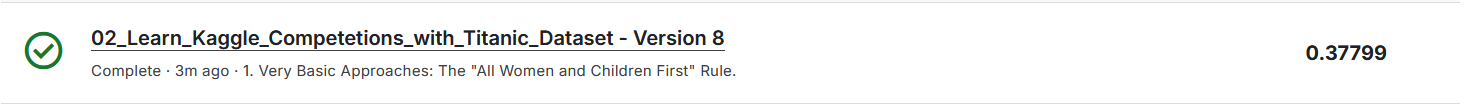
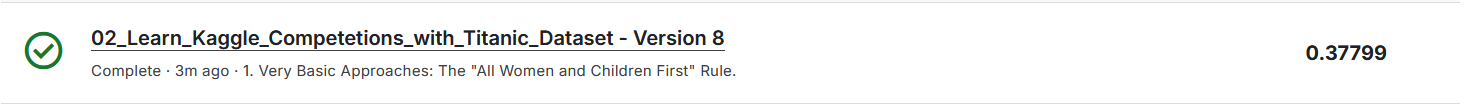

*   **The "All Women and Children First" Rule:**
    *   **Pros:** Very simple to implement and understand. Reflects a real-world historical pattern.
    *   **Cons:** Overly simplistic. Doesn't consider other potentially important factors like passenger class, fare, etc. It will misclassify many men and some women/children.
    >*   **"Okay, it's easy, but it's not very accurate. What can we do next?"**

## 1.(b) **Simple Rule-Based Models:**

* **Simple Rule-Based Models:**
    *   We build upon the basic rule by adding more conditions and thresholds based on our understanding of the data. For example, we might say "If female or (child *and* first class), predict survival."
    *   **How it works:** We analyze the data (using things like histograms, bar charts, etc.) to find relationships between features and survival. Then, we translate these relationships into "if-then-else" rules.
    *   **Why do this?** It allows us to incorporate our initial observations about the data directly into our predictions.

import pandas as pd
import numpy as np

### Load Data

Note: This rule uses 'Sex', 'Age', and 'Pclass'.
We need to make sure 'Age' has no missing values for the child check.
If your preprocessing hasn't filled missing 'Age' in test_df,
fill it here, ideally using the median age from the training data.

First, ensure 'Age' is filled if not already done.
Using median from training data is a common simple approach.
You would typically calculate the median from train_df['Age'].median()
Let's assume a median value or use test_df's median if training median isn't available here.
(It's best practice to use the training median, but for a self-contained example...)

In [ ]:
if test_df['Age'].isnull().any():
    median_age = train_df['Age'].median() # Using test median for this example
    test_df['Age_Filled'] = test_df['Age'].fillna(median_age)
else:
    test_df['Age_Filled'] = test_df['Age'] # No missing age, just copy

### Define the Rules
We'll implement the following rules:
1. Predict survival (1) for all women.
2. Predict survival (1) for all children (Age < 18).
3. Predict survival (1) for men in Pclass 1.
4. Predict non-survival (0) for all others.

Create a new column for predictions, initialized to 0 (assuming non-survival by default)

In [ ]:
test_df['Survived_Prediction'] = 0

### Apply Rule 1: Women First
If 'Sex' is 'female' (encoded as 1), set 'Survived_Prediction' to 1.

In [ ]:
test_df.loc[test_df['Sex'] == 1, 'Survived_Prediction'] = 1

### Apply Rule 2: Children First
If 'Age_Filled' is less than 18, set 'Survived_Prediction' to 1.
This rule will override the default 0 for young males.

In [ ]:
test_df.loc[test_df['Age_Filled'] < 18, 'Survived_Prediction'] = 1

### Apply Rule 3: Men in First Class
If 'Sex' is 'male' (encoded as 0) AND 'Pclass' is 1, set 'Survived_Prediction' to 1.
Note: This rule will not override the predictions for women or children already set to 1.

In [ ]:
test_df.loc[(test_df['Sex'] == 0) & (test_df['Pclass'] == 1), 'Survived_Prediction'] = 1

### Create Submission File
Kaggle expects a CSV file with two columns: PassengerId and Survived.

Create a DataFrame with the required columns
We use the saved test_ids and our new 'Survived_Prediction' column

In [ ]:
submission_df = pd.DataFrame({'PassengerId': test_ids, 'Survived': test_df['Survived_Prediction']})

### Display the first few rows of the submission file

In [ ]:
print("Submission file preview:")
print(submission_df.head())

### Save the submission file as a CSV.
index=False prevents pandas from writing the DataFrame index as a column.

In [ ]:
submission_df.to_csv('simple_rule_based_submission.csv', index=False)
print("\nSubmission file 'simple_rule_based_submission.csv' created successfully.")

### Note: It'd save it to the /kaggle/working/ directory.

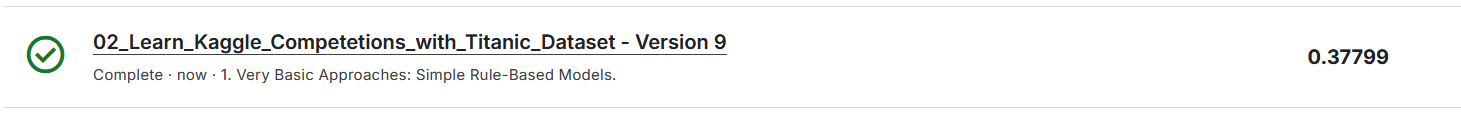

* **Simple Rule-Based Models:**
    *   **Pros:** Still relatively simple to understand and implement. Can be more accurate than the "All Women and Children First" rule.
    *   **Cons:** Can become complex and unwieldy as we add more rules. We're still manually encoding patterns, which can be time-consuming and might miss subtle relationships.
    >*   **"We're improving (probably), but this is getting complicated. Can't a machine learn these rules automatically?"**

## **2. Basic Machine Learning Models:**
> "Let the Machine Learn"

These are models that learn patterns from the data without us having to explicitly write out rules.

## 2.(a) **Linear Regression:**
*   **Linear Regression:**
    *   Linear Regression is designed for... regression problems, where we're trying to predict a continuous numerical value. But Here we have to classify into Survive or not Survive.
    *   **How Does Linear Regression Work?** Linear Regression tries to find the best-fitting straight line (in a 2D space) or hyperplane (in higher dimensions) that describes the relationship between the input features and the output variable.
        * The output is a numerical value on a continuous scale.
        * The model learns coefficients for each feature, representing the strength and direction of the relationship between the feature and the output.

    * **Why is Linear Regression a Problematic Choice for Binary Classification?**

        1.  **Output Range:** Linear Regression can predict any numerical value (positive or negative, any magnitude). However, in binary classification, we want a prediction that's either 0 or 1 (or a probability between 0 and 1).
        2.  **Interpretation:** In binary classification, we're often interested in probabilities (the likelihood of survival). Linear Regression doesn't directly provide probabilities. It provides a numerical value that might be far outside the 0-1 range.
        3.  **Decision Boundary:** Linear Regression finds a linear decision boundary. The relationship between survival and features like age, sex, class, etc., might not be perfectly linear. A linear boundary might not accurately separate the survivors from the non-survivors.
        4.  **Error Metric:** Linear Regression is typically trained to minimize the sum of squared errors. This error metric is not ideal for classification problems.

    * **What Happens If We Try to Force Linear Regression?**

        We *could* (more like we will) try to force Linear Regression to solve the Titanic problem by:
        
        1.  Training a Linear Regression model.
        2.  Applying a threshold to the output. For example, if the predicted value is greater than 0.5, predict survival (1); otherwise, predict non-survival (0).
        
        However, this approach has several issues:
        
        *   The model might predict values far outside the 0-1 range, making the thresholding arbitrary.
        *   The model won't be optimized for classification accuracy. It will still be trying to minimize squared errors, which is not the right goal for classification.
        *   We won't get well-calibrated probabilities. The numbers outputted by the Linear Regression are unlikely to be a real measurement of probability.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # Import the Linear Regression model

#### Prepare Data for Modeling
Define the features (X) and target (y)
We need to select the columns that will be used as input for the model.
These should be the numerical and encoded features from your preprocessed data.
Exclude the target variable 'Survived' from the features.

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'FamilySize', 'IsAlone', 'Title',
            'Embarked_Q', 'Embarked_S'] # Include one-hot encoded Embarked columns

In [ ]:
# Separate features (X) and target (y) for the training data
X_train = train_df[features]
y_train = train_df['Survived']

In [ ]:
# Prepare the features for the test data
X_test = test_df[features]

Handle potential missing values in the selected features of X_test if any remain
Although preprocessing should handle this, a final check is good practice.
For simplicity here, we'll fill any remaining NaNs with 0 or a suitable value.
A more robust approach would use imputation strategy learned from training data.

In [ ]:
X_train = X_train.fillna(0) # Fill NaNs in training features
X_test = X_test.fillna(0) # Fill NaNs in test features

#### Create and Train the Linear Regression Model
Initialize the Linear Regression model

In [ ]:
%%time
model = LinearRegression()

Train the model using the training data (features and target)
The model learns the coefficients that best fit a linear relationship
between the features and the target variable (Survived).

In [ ]:
%%time
print("Training Linear Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

#### Make Predictions on the Test Data
Use the trained model to predict the 'Survived' outcome for the test data.
Linear Regression will output continuous values (not strictly 0 or 1).

In [ ]:
%%time
predictions_continuous = model.predict(X_test)

#### Convert Continuous Predictions to Binary (0 or 1) 
Since Linear Regression outputs continuous values, we need to apply a threshold
to convert them into binary predictions (0 for not survived, 1 for survived).
A common threshold for binary classification is 0.5.

In [ ]:
predictions_binary = (predictions_continuous > 0.5).astype(int)

#### Create Submission File
Prepare the submission DataFrame in the required format: PassengerId, Survived

In [ ]:
submission_df = pd.DataFrame({'PassengerId': test_ids, 'Survived': predictions_binary})

#### Display the first few rows of the submission file

In [ ]:
print("\nSubmission file preview (Linear Regression with 0.5 threshold):")
print(submission_df.head())

#### Save Submission File 

In [ ]:
submission_df.to_csv('linear_regression_submission.csv', index=False)
print("\nSubmission file 'linear_regression_submission.csv' created successfully.")

#### Optional: Inspect Model Coefficients
Let's look at the coefficients to see which features the model
considers most important in its linear equation.

In [ ]:
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

#### Note on Linear Regression for Classification:
While this code runs, Linear Regression is not designed for binary classification.
Its output is continuous, and the 0.5 threshold is an arbitrary way to force
binary predictions. Models like Logistic Regression are specifically built
to model probabilities for classification tasks and are generally more suitable.

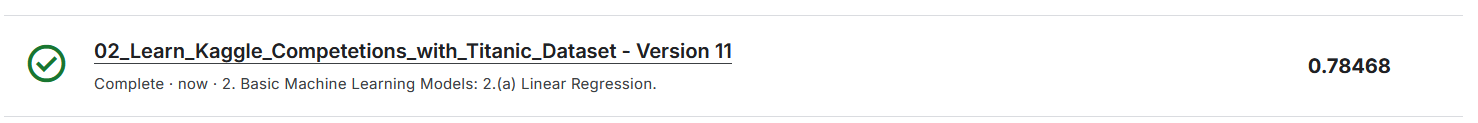

>"Can we use Linear Regression for the Titanic problem? Well, Linear Regression is designed for predicting continuous values, but we're trying to predict a binary outcome (survival or not). It's like trying to use a hammer to screw in a screw – it might work, but it's not the right tool for the job. We should use models that are specifically designed for classification."

>**In short: Linear Regression is not a suitable choice for the Titanic dataset's binary classification problem. We need to use classification algorithms instead.**

## 2.(b) **Logistic Regression:**
*   **Logistic Regression:**
    *   A linear model used for binary classification (predicting one of two outcomes: survival or not survival).
    *   **How it works:** It models the *probability* of survival using a sigmoid function (a function that squashes values between 0 and 1). It finds the best-fitting line (in higher dimensions) to separate the survivors from the non-survivors.
    *   **Why use it?** It's simple, interpretable, and a good starting point for many classification problems. We can see which features are most strongly associated with survival.
    *   **Pros:** Easy to understand and implement. Provides probabilities, which can be useful. Fast to train.
    *   **Cons:** Linear model, so it might not capture complex, non-linear relationships in the data. Can underperform compared to more complex algorithms if the relationship is not linear.
    >*   **"It's a good start, but our data might not be perfectly linear. Can we use something that can handle more complex patterns?"**

## 2.(c) **K-Nearest Neighbors (KNN):**
*   **K-Nearest Neighbors (KNN):**
    *   A non-parametric, instance-based learning algorithm. It classifies a new passenger based on the majority class of the *k* most similar passengers in the training data.
    *   **How it works:** Imagine plotting each passenger in a multi-dimensional "feature space" (where each dimension is a feature like age, fare, etc.). When we want to classify a new passenger, KNN finds the *k* closest passengers in the training data and predicts the class that's most common among those neighbors.
    *   **Why use it?** Simple to understand and implement. Doesn't make strong assumptions about the data distribution.
    *   **Pros:** Simple to understand and implement. Can capture non-linear relationships.
    *   **Cons:** Can be computationally expensive, especially with large datasets (we need to calculate distances to all training points). Sensitive to the choice of *k* and the distance metric. Doesn't handle high-dimensional data well (the "curse of dimensionality").
    >*   **"KNN is okay, but it can be slow. Is there a faster way to capture non-linear patterns?"**

## 2.(d) **Naive Bayes:**
*   **Naive Bayes:**
    *   A probabilistic classifier based on Bayes' theorem.
        *   **What's Bayes' theorem?** It's a way to calculate the probability of an event based on prior knowledge of conditions related to the event.
    *   **How it works:** It assumes that the features are independent of each other given the class (which is often "naive," hence the name). It calculates the probability of survival given the passenger's features and the probability of not surviving given the same features, and predicts the class with the higher probability.
    *   **Why use it?** Relatively simple and fast. Can perform well with limited data.
    *   **Pros:** Simple and fast to train. Works well with categorical features. Can be surprisingly effective in some cases.
    *   **Cons:** The "naive" independence assumption is often violated in real-world data, which can hurt performance. Less accurate than more sophisticated models when the independence assumption is significantly violated.
    >*   **"It's fast, but the independence assumption might be too strong. What about models that can explicitly model feature interactions?"**

## **3. More Advanced Tree-Based Models:**

>"Branching Out"

These models use tree structures to make decisions, allowing them to capture complex relationships between features.

### **Decision Tree:**
*   **Decision Tree:**
    *   A non-linear model that makes predictions by following a tree structure of decisions based on feature values.
    *   **How it works:** The model builds a tree where each internal node represents a test on a feature (e.g., "Is age less than 30?"), each branch represents the outcome of the test, and each leaf node represents a prediction (survival or not).
    *   **Why use it?** Easy to understand and visualize. Can capture complex relationships between features.
    *   **Pros:** Easy to interpret and visualize. Can handle both categorical and numerical features. Can capture non-linear relationships and feature interactions.
    *   **Cons:** Prone to overfitting, especially with complex trees. Small changes in the data can lead to very different tree structures. Can be unstable and have high variance (different trees trained on slightly different data can give very different predictions).
    >*   **"Decision trees are interpretable, but they overfit easily. How can we make them more robust?"**

### **Random Forest:**
*   **Random Forest:**
    *   An ensemble of many decision trees.
        *   **What's an ensemble?** It's a method of combining multiple models to get better performance than any single model. Think of it as the "wisdom of the crowd."
    *   **How it works:**
        1.  It creates many decision trees (a "forest").
        2.  Each tree is trained on a random subset of the data (bootstrap sampling).
        3.  Each tree is also trained using a random subset of the features.
        4.  To make a prediction, it aggregates the predictions of individual trees (e.g., majority vote for classification).
    *   **Why use it?** Reduces variance and improves robustness compared to a single decision tree. It's a powerful and widely used algorithm.
    *   **Pros:** More accurate than a single decision tree. Reduces overfitting. Can handle many features. Relatively robust to outliers. Provides feature importance estimates (tells you which features are most influential in the predictions).
    *   **Cons:** Less interpretable than a single decision tree. Can be computationally expensive to train (especially with many trees).
    >*   **"Random Forest is great for accuracy, but can we use a completely different approach?"**

## **4. Support Vector Machines (SVM):**
> "Finding the Best Separator"

### **Support Vector Machine (SVM):**
*   **Support Vector Machine (SVM):**
    *   A powerful model that finds an optimal hyperplane to separate classes.
        *   **What's a hyperplane?** It's a line in 2D, a plane in 3D, and a higher-dimensional analogue in higher dimensions. It's the decision boundary that separates the classes.
    *   **How it works:** SVM tries to find the hyperplane that maximizes the margin (the distance between the hyperplane and the closest data points of each class). It focuses on the "support vectors" (the data points closest to the hyperplane), which are the most important points for defining the decision boundary.
    *   **Why use it?** Effective in high-dimensional spaces. Can use different kernels (linear, polynomial, RBF) to handle non-linear relationships.
        *   **What's a kernel?** It's a function that transforms the data into a higher-dimensional space where it might be easier to separate.
        *   **Common kernels:**
            *   **Linear:** Suitable for linearly separable data.
            *   **Polynomial:** Can capture polynomial relationships.
            *   **RBF (Radial Basis Function):** A popular kernel that can capture complex non-linear relationships.
    *   **Pros:** Effective in high-dimensional spaces. Can capture non-linear relationships using kernels. Regularization built-in (helps prevent overfitting).
    *   **Cons:** Can be computationally expensive to train, especially with large datasets. Kernel choice and parameter tuning can be tricky. Less interpretable than decision trees.
    >*   **"SVM is powerful, but can we improve even further by combining models in a different way?"**

## **5. Gradient Boosting Models:**
> "Boosting Performance"

These models build an ensemble of weak learners (typically decision trees) sequentially, where each new model corrects the errors made by the previous ones.

### **Gradient Boosting Machines (GBM):**
*   **Gradient Boosting Machines (GBM):**
    *   A general framework for building ensembles of weak prediction models.
    *   **How it works:**
        1.  Starts by training a simple model (e.g., a decision tree) on the training data.
        2.  Calculates the errors (residuals) made by the model.
        3.  Trains a new model on the residuals, focusing on the data points where the previous model made the biggest errors.
        4.  Combines the predictions of the new model with the predictions of the previous models.
        5.  Repeats steps 2-4 for a certain number of iterations or until the performance stops improving.
    *   **Why use it?** Can achieve high accuracy. Powerful and flexible.
    *   **Pros:** High accuracy. Can handle complex relationships. Feature importance estimates.
    *   **Cons:** Prone to overfitting if not tuned properly. Can be computationally expensive.
    >*   **"GBM is good, but can we make it faster and more efficient?"**

### **XGBoost (Extreme Gradient Boosting):**
*   **XGBoost (Extreme Gradient Boosting):**
    *   A highly optimized and popular implementation of gradient boosting.
    *   **How it works:** Same basic principles as GBM, but with several enhancements:
        *   **Regularization:** Techniques to prevent overfitting.
        *   **Parallel processing:** Can use multiple cores to speed up training.
        *   **Handling missing values internally:** No need to impute missing values beforehand.
        *   **Tree pruning:** Optimizes tree growth to avoid overfitting.
    *   **Why use it?** Known for its speed and performance. Often wins machine learning competitions.
    *   **Pros:** High accuracy. Fast training speed. Regularization. Handles missing values. Feature importance estimates.
    *   **Cons:** Can be complex to tune. Still prone to overfitting if not tuned properly.
    >*   **"XGBoost is great, but is there an even faster gradient boosting algorithm?"**

### **LightGBM (Light Gradient Boosting Machine):**
*   **LightGBM (Light Gradient Boosting Machine):**
    *   Another high-performance gradient boosting framework.
    *   **How it works:** Uses a different tree-building algorithm (leaf-wise) than XGBoost (level-wise).
        *   **Level-wise:** Grows the tree level by level, adding the best split across all leaves.
        *   **Leaf-wise:** Grows the tree by adding the leaf with the largest loss change, which can lead to faster convergence and better accuracy, especially on large datasets with many features.
    *   **Why use it?** Often faster than XGBoost, especially on large datasets.
    *   **Pros:** High accuracy. Very fast training speed. Handles large datasets well. Lower memory usage.
    *   **Cons:** Can overfit more easily than XGBoost if not tuned properly. Less widely used than XGBoost, so less community support.
    >*   **"LightGBM is great, but let's look at other methods"**
    

### **CatBoost:**
*   **CatBoost:**
    *   CatBoost is a gradient boosting algorithm developed by Yandex. The "Cat" in CatBoost stands for "Category," highlighting its strong ability to handle categorical features.
    *   **How it works:** CatBoost uses similar principles to other gradient boosting methods (GBM, XGBoost, LightGBM):
        1.  Builds an ensemble of weak learners (typically decision trees) sequentially.
        2.  Each new model corrects the errors made by the previous ones.
        3.  Uses gradient descent to optimize the model.
    
        However, CatBoost has several key innovations:
    
        *   **Handling Categorical Features Directly:** CatBoost can directly handle categorical features without requiring one-hot encoding or other preprocessing steps.
            *   **How?** CatBoost uses a sophisticated method called "ordered boosting" and "target-based statistics" to encode categorical features on the fly during training. It essentially calculates statistics (like the survival rate) for each category value and uses those statistics to encode the category. This helps to avoid target leakage (a form of data leakage where information from the target variable leaks into the features), which can lead to overfitting.
        *   **Ordered Boosting:** This is a permutation-driven alternative to the traditional gradient boosting algorithm. It helps prevent overfitting by using a different ordering of data samples for calculating gradients at each boosting step.
        *   **Symmetric Trees:** CatBoost grows balanced decision trees (symmetric trees), which can lead to faster prediction times.
    
    *   **Why use it?** CatBoost is known for its robustness, good accuracy, and ability to handle categorical features directly.
    *   **Pros:**
        *   **Excellent accuracy:** Often competitive with or better than XGBoost and LightGBM.
        *   **Handles categorical features directly:** Saves time and effort in preprocessing. Reduces the risk of information leakage.
        *   **Robust to hyperparameter tuning:** Often performs well with default settings, making it easier to get started.
        *   **Ordered boosting helps prevent overfitting.**
        *   **Symmetric trees can lead to faster prediction times.**
        *   **Built-in tools for visualization and model analysis.**
    *   **Cons:**
        *   Can be slower to train than LightGBM on very large datasets (though recent improvements have made it more competitive).
        *   Can still be prone to overfitting if not tuned properly.
        *   The "ordered boosting" approach can be more computationally intensive.
        *   Less control over the tree structure compared to XGBoost (symmetric trees).
    *   **Where does it fit in the modeling process for the Titanic dataset?**
        *   CatBoost is a strong contender in the model selection process, especially since the Titanic dataset has categorical features like "Sex," "Embarked," and "Title."
        *   We can compare its performance to XGBoost and LightGBM to see which gradient boosting method works best for this specific problem.
        *   We'd still need to preprocess the data (handling missing values, feature engineering), but CatBoost's ability to handle categorical features directly simplifies the encoding step.

### **Comparison with XGBoost and LightGBM:**

| Feature                 | CatBoost                                                                                                                                       | XGBoost                                                                                                                                              | LightGBM                                                                                                                                                                |
| ----------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Categorical Features    | Handles them directly using ordered boosting and target-based statistics.                                                                   | Requires one-hot encoding or other numerical encoding methods.                                                                                       | Requires numerical encoding. Can handle categorical features using a special "categorical_feature" parameter, but the encoding is less sophisticated than CatBoost's. |
| Tree Growth             | Grows symmetric (balanced) trees.                                                                                                                | Can grow both symmetric and non-symmetric trees.                                                                                                     | Grows trees leaf-wise (can lead to faster convergence but also increased overfitting).                                                                              |
| Overfitting Prevention  | Ordered boosting and other regularization techniques.                                                                                             | L1 and L2 regularization, tree pruning.                                                                                                            | Leaf-wise tree growth can lead to overfitting, so careful parameter tuning is crucial.                                                                               |
| Training Speed          | Can be slower than LightGBM on very large datasets, but generally competitive.                                                                  | Relatively fast training speed.                                                                                                                      | Generally the fastest training speed among the three.                                                                                                                     |
| Accuracy                | Often achieves excellent accuracy, competitive with or better than XGBoost and LightGBM.                                                         | High accuracy.                                                                                                                                     | High accuracy, but can be more prone to overfitting than XGBoost and CatBoost.                                                                                         |
| Ease of Use             | Relatively easy to use, often performs well with default settings.                                                                               | More parameters to tune compared to CatBoost.                                                                                                      | Requires careful parameter tuning to prevent overfitting.                                                                                                               |
| Community and Ecosystem | Growing community and ecosystem, but still smaller than XGBoost and LightGBM.                                                                   | Large and active community, extensive documentation and resources.                                                                                     | Large and active community, but perhaps slightly smaller than XGBoost's.                                                                                               |

>*   **"These gradient boosting methods are powerful, but can we try a completely different approach to learning complex patterns?"**

## **6. Neural Network Models:**

> "Mimicking the Brain"

These models are inspired by the structure and function of biological neural networks.

### **Simple Artificial Neural Network (ANN):**
*   **Simple Artificial Neural Network (ANN):**
    *   A computational model consisting of interconnected nodes (neurons) organized in layers: an input layer, one or more hidden layers, and an output layer.
    *   **How it works:**
        1.  Input data is fed into the input layer.
        2.  Each connection between neurons has a weight associated with it.
        3.  Neurons apply an activation function (e.g., sigmoid, ReLU) to the weighted sum of their inputs.
        4.  The output of one layer becomes the input to the next layer.
        5.  The network learns by adjusting the weights based on the input data and the desired output (using an optimization algorithm like gradient descent).
    *   **Why use it?** Can learn complex non-linear patterns.
    *   **Pros:** Can learn highly complex patterns. Flexible and adaptable.
    *   **Cons:** Can be complex to design and train. Requires careful tuning of hyperparameters (e.g., number of layers, number of neurons, learning rate). Prone to overfitting, especially with smaller datasets. Can be computationally expensive to train.
    >*   **"Simple ANNs are good, but can we make them even more powerful by adding more layers?"**

### **Deep Neural Network (DNN):**
*   **Deep Neural Network (DNN):**
    *   An ANN with multiple hidden layers (more than one or two).
    *   **How it works:** Same principles as a simple ANN, but the multiple hidden layers allow the network to learn more abstract and hierarchical representations of the data.
    *   **Why use it?** Can learn even more complex patterns than simple ANNs.
    *   **Pros:** Can learn very complex patterns. Can automatically extract relevant features from the data.
    *   **Cons:** Even more complex to design and train than simple ANNs. Requires even more careful tuning of hyperparameters. Even more prone to overfitting on smaller datasets. Even more computationally expensive to train. Might be overkill for a relatively simple dataset like Titanic.
    >*   **"Neural networks are interesting, but they can be tricky. Let's go back to ensembling: can we combine different models to get the best of both worlds?"**

## **7. Ensemble Methods:**

>"The Wisdom of the Crowd"

These methods combine the predictions of multiple models to improve performance.

### **Voting Classifier:**
*   **Voting Classifier:**
    *   A simple ensemble method that combines the predictions of multiple different machine learning models.
    *   **How it works:**
        *   Trains several different models (e.g., Logistic Regression, Random Forest, SVM).
        *   To make a prediction, it either:
            *   **Hard voting:** Predicts the class that's predicted by the majority of the models.
            *   **Soft voting:** Averages the predicted probabilities from each model and predicts the class with the highest average probability.
    *   **Why use it?** Leverages the strengths of diverse models. Can often improve accuracy compared to any single model.
    *   **Pros:** Simple to implement. Can improve accuracy and robustness.
    *   **Cons:** Requires training multiple models. Performance depends on the diversity and accuracy of the base models.
    >*   **"Voting is good, but let's  use a more sophisticated way to combine models."**

### **Stacking:**
*   **Stacking:**
    *   A more advanced ensembling technique where the predictions of base models are used as input features for a second-level "meta-model."
    *   **How it works:**
        1.  Trains several "base models" (e.g., Logistic Regression, Random Forest, XGBoost).
        2.  Makes predictions on the training data using each base model.
        3.  Creates a new dataset where the features are the predictions of the base models.
        4.  Trains a "meta-model" (e.g., Logistic Regression, Gradient Boosting) on this new dataset.
        5.  To make a prediction on new data, it first makes predictions with the base models, then feeds those predictions into the meta-model.
    *   **Why use it?** Can achieve high performance. Can learn how to best combine the predictions of different models.
    *   **Pros:** Can achieve high accuracy. Flexible.
    *   **Cons:** More complex to implement than voting. Prone to overfitting if not done carefully. Can be computationally expensive.
    >*   **"Stacking is powerful, but it's complex. Let's go back to a simpler ensembling technique: what about training multiple instances of the *same* model?"**

### **Bagging (Bootstrap Aggregating):**
*   **Bagging (Bootstrap Aggregating):**
    *   Training multiple instances of the same model on different bootstrap samples of the training data.
        *   **What's a bootstrap sample?** A random sample of the training data taken with replacement (meaning the same data point can be selected multiple times).
    *   **How it works:**
        1.  Creates multiple bootstrap samples of the training data.
        2.  Trains a model on each bootstrap sample.
        3.  To make a prediction, it aggregates the predictions of the individual models (e.g., averaging for regression, majority voting for classification).
    *   **Why use it?** Reduces variance (helps prevent overfitting).
    *   **Pros:** Reduces variance. Simple to implement. Can improve accuracy.
    *   **Cons:** Only works well with unstable models (models that are sensitive to changes in the training data, like decision trees).
    >*   **"Bagging is good, and Random Forest is a specific type of bagging... Is there anything else we can try?"**

## **8. Reinforcement Learning (Unconventional):**

> "Thinking Outside the Box"

*   **Conceptual Application using RL:**
    *   Applying Reinforcement Learning directly to a static, tabular classification problem like the Titanic is unconventional.
        *   **What is Reinforcement Learning (RL)?** RL involves an agent interacting with an environment to maximize a reward signal over time.
    *   **How it could *conceptually* apply:** One could frame the problem as an agent needing to make a sequence of "decisions" (e.g., about a passenger's survival) based on their features, receiving a "reward" for correct predictions.
    *   **Why is this unconventional?** This doesn't align well with the core strengths of RL (sequential decision-making in dynamic environments). RL is designed for situations where an agent learns through trial and error by interacting with a constantly changing environment. The Titanic dataset is a static dataset, meaning the data doesn't change over time.
    *   **Pros:** (Conceptual) Could potentially learn complex decision-making policies.
    *   **Cons:** Significantly over-engineering the solution for this dataset. Standard supervised learning methods are far more appropriate and effective. Very difficult to implement and tune for this problem.
    >*   **"Okay, RL is interesting, but probably not the right tool for this job. We should stick to standard supervised learning methods."**

## **9. TBA (To Be Announced):**

This is a placeholder for any future methods or techniques that might become relevant for the Titanic dataset. Machine learning is a constantly evolving field, so there's always something new to learn!

## **In summary:**

We've explored a range of models, starting from very simple rules and moving to more complex machine-learning algorithms. Each model has its own strengths and weaknesses, and the best choice depends on the specific data and the goals of the project. 

For the Titanic dataset, we will mostly focus on models like Random Forest, XGBoost, LightGBM, or ensemble methods like Voting and Stacking, as these tend to perform well on tabular data and are relatively robust to overfitting. Anyway We will see this in Comparisons.

However, it's always good to start with simpler models like Logistic Regression to establish a baseline and gain a better understanding of the data.

### **Now let's Compare all the models we have gone through and do a final selection of which one we should go on with.**

# 4. Comparison 

# Conclusion

# Changelog

29 April 2025 IST (UTC+5.30)

* Initial Completion of Basic Structure of Section 3. Modelling

28 April 2025 IST (UTC+5.30)

* Initial Public Release
* Initial Completion of Section 1. Introduction
* Initial Completion of Section 2. Data


# *References:*

* [Tech With Tim - Youtube](https://www.youtube.com/@TechWithTim/)
* [3blue1brown - Youtube](https://www.youtube.com/@3blue1brown)
* [Statquest - Youtube](https://www.youtube.com/@statquest)
* [ML Specialization Andrew Ng](https://www.coursera.org/specializations/machine-learning-introduction)
* [DL Specialization Andrew Ng](https://www.coursera.org/specializations/deep-learning)
* [DataCamp Tutorial: Machine Learning from the Titanic](https://www.datacamp.com/tutorial/tutorial-kaggle-competition-tutorial-machine-learning-from-titanic)
* [Introduction to Kaggle and Scoring Top 7 in the Titanic Competition](https://towardsdatascience.com/introduction-to-kaggle-and-scoring-top-7-in-the-titanic-competition-7a29ce9c24ae/)
* [agconti/kaggle-titanic GitHub Repository](https://github.com/agconti/kaggle-titanic/blob/master/ReadMe.md)
* [A Comprehensive Guide to Titanic Machine Learning - Kaggle](https://www.kaggle.com/code/eraaz1/a-comprehensive-guide-to-titanic-machine-learning)
* [What I Learned Analyzing the Famous Titanic Dataset - LinkedIn Pulse](https://www.linkedin.com/pulse/what-i-learned-analyzing-famous-titanic-dateset-murilo-gustineli)
* [Titanic - Machine Learning from Disaster | Kaggle Competition](https://www.kaggle.com/competitions/titanic)
* [Titanic Tutorial - Kaggle](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)
* [Titanic: A step by step intro to Machine Learning - Kaggle](https://www.kaggle.com/code/ydalat/titanic-a-step-by-step-intro-to-machine-learning)
* [A Beginner's Analysis of the Titanic Dataset - Kaggle](https://www.kaggle.com/code/idawoodjee/a-beginner-s-analysis-of-the-titanic-dataset)
* [CS470 Homework 6 - Yale University](https://zoo.cs.yale.edu/classes/cs470/materials/hws/hw6/hw6.html)
* [Titanic: A Complete Beginner's Guide - Kaggle](https://www.kaggle.com/code/reighns/titanic-a-complete-beginner-s-guide)
* [Kaggle Titanic Data Exploration - Observable](https://observablehq.com/@jjimenez/kaggle-titanic-data-exploration)
* [Data Science with Spark - SlideShare](https://www.slideshare.net/ksankar/data-science-with-spark)
* [YouTube video 1](https://www.youtube.com/watch?v=I3FBJdiExcg)
* [FDS Lecture Notes - University of Edinburgh](https://opencourse.inf.ed.ac.uk/sites/default/files/2024-01/FDS-lecture-notes-2024-01-28.pdf)
* [YouTube video 2](https://www.youtube.com/watch?v=2fExV5KHU9s)